### Read in data and explore

In [1]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Download data
#! wget www2.ph.ed.ac.uk/~jzuntz/dsfs/4-Refuge.zip
#! unzip 4-Refuge.zip
#! wget www2.ph.ed.ac.uk/~jzuntz/dsfs/World-Background-Data.zip
#! unzip World-Background-Data.zip
#! rm -rf World-Background-Data.zip __MACOSX 4-Refuge.zip

In [2]:
# Read in data
population = pd.read_csv("data/population.csv", skiprows=14)
solutions = pd.read_csv("data/solutions.csv", skiprows=15)
applications = pd.read_csv("data/asylum-applications.csv")
decisions = pd.read_csv("data/asylum-decisions.csv")

borders = gpd.read_file("World-Background-Data/world_borders.geo.json")

In [4]:
# Explore content in each dataset
population.head(5)
#solutions.tail(5)
#applications.head(5)
#decisions.head(5)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Venezuelans displaced abroad,Stateless persons,Others of concern
0,1951,Unknown,NaN,Australia,AUS,180000,0,0,NaN,0,0
1,1951,Unknown,NaN,Austria,AUT,282000,0,0,NaN,0,0
2,1951,Unknown,NaN,Belgium,BEL,55000,0,0,NaN,0,0
3,1951,Unknown,NaN,Canada,CAN,168511,0,0,NaN,0,0
4,1951,Unknown,NaN,Denmark,DNK,2000,0,0,NaN,0,0


In [6]:
#population.query("`Year` == 2020").sort_values(by='IDPs of concern to UNHCR', ascending=False)[:10]

### Analyse population data 

In [5]:
# Add new columns for total people displaced and total people displaced abroad

population['total'] = population['Refugees under UNHCR\'s mandate'].fillna(0) \
                    + population['Asylum-seekers'].fillna(0) + population['IDPs of concern to UNHCR'].fillna(0) \
                    + population['Venezuelans displaced abroad'].fillna(0) + population['Stateless persons'].fillna(0) \
                    + population['Others of concern'].fillna(0)

# Total abroad includes: refugees, asylum seekers, Venezuelans displaced abroad
population['total_abroad'] = population['Refugees under UNHCR\'s mandate'].fillna(0) \
                    + population['Asylum-seekers'].fillna(0) + population['Venezuelans displaced abroad'].fillna(0)


<ipython-input-6-ff9c3a7345c9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(round(x / 1e6, 1)) for x in current_values])


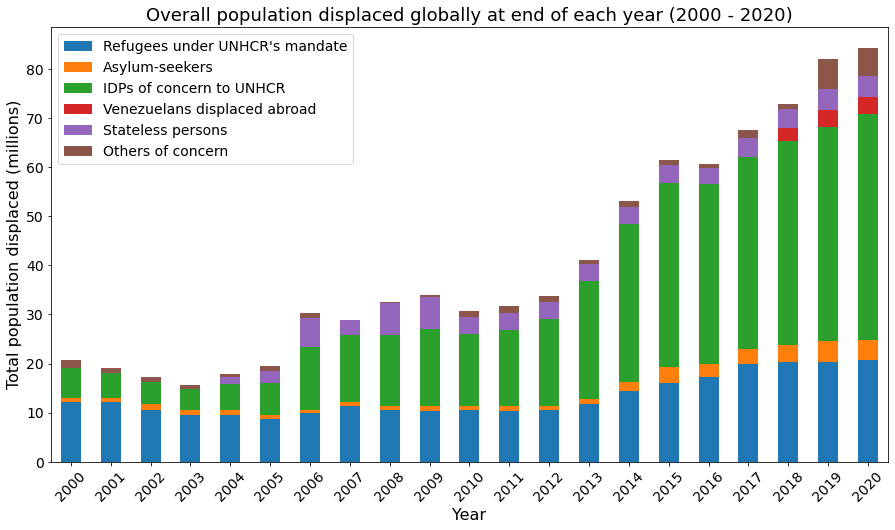

In [6]:
# Group population data by year and sum the total number for each column
# Focus on years after 2000 as this is the time period with most complete data across
pop = population.query("`Year` >= 2000")
pop = pop.groupby(by='Year').sum()

# Plot the total number people displaced over time
pop.plot(y=['Refugees under UNHCR\'s mandate', 'Asylum-seekers', 'IDPs of concern to UNHCR', 
            'Venezuelans displaced abroad', 'Stateless persons','Others of concern'],
            kind='bar', stacked=True, fontsize=14, rot=45,
            figsize=(15, 8))

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(round(x / 1e6, 1)) for x in current_values])

plt.title('Overall population displaced globally at end of each year (2000 - 2020)', fontsize=18)
plt.ylabel('Total population displaced (millions)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(fontsize=14)

#plt.savefig('figures/globalpopdisplacement2000-2020', format='png', dpi=300, bbox_inches='tight')

plt.show()

<ipython-input-8-a1d8e6fc78e9>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:.0f}'.format(round(x / 1e6, 1)) for x in ax1.get_yticks()], fontsize=14)
<ipython-input-8-a1d8e6fc78e9>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:.1f}'.format(round(x / 1e6, 1)) for x in ax2.get_yticks()], fontsize=14)


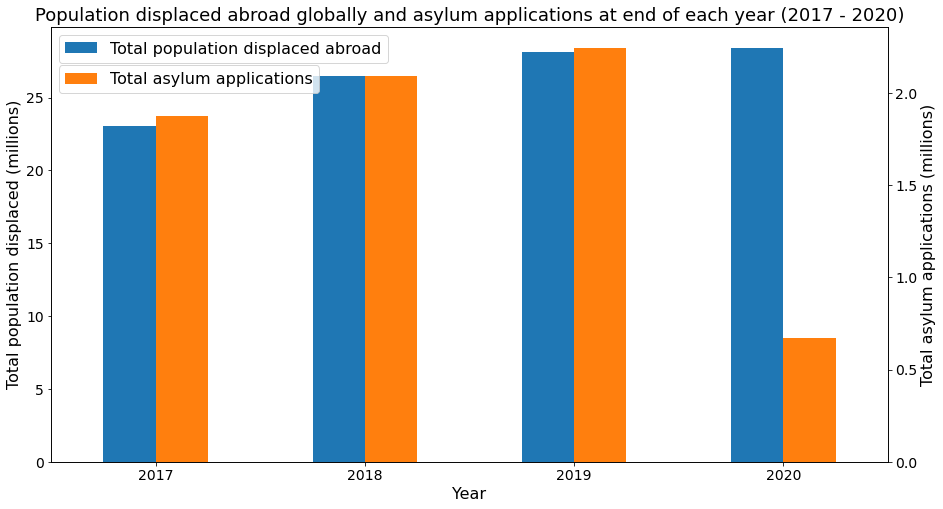

In [8]:
# Group asylum data by year
asylapps = applications.groupby('Year').sum()


# Create new dataframe with:total population displaced, total displaced abroad, asylum applications
pop_asylapps = pd.DataFrame(data = {'total' : pop['total'],
                                   'total_abroad' : pop['total_abroad'],
                                   'asylum_apps' : asylapps['applied']})

# Focus on the last 4 years
pop_asylapps = pop_asylapps.query("`Year` >= 2017")

# Plot the total population displaced and asylum applications for the last 4 years
pop_asylapps.plot(y=['total_abroad', 'asylum_apps'],
            kind='bar', fontsize=14, secondary_y=['asylum_apps'], rot=360, 
            figsize=(15, 8))

ax1, ax2 = plt.gcf().get_axes()
ax1.set_ylabel('Total population displaced (millions)', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.legend(['Total population displaced abroad'], loc='upper left', fontsize=16)
ax1.set_yticklabels(['{:.0f}'.format(round(x / 1e6, 1)) for x in ax1.get_yticks()], fontsize=14)
ax1.set_title('Population displaced abroad globally and asylum applications at end of each year (2017 - 2020)', fontsize=18)

ax2.set_ylabel('Total asylum applications (millions)', fontsize=16)
ax2.legend(['Total asylum applications'], loc='upper left', bbox_to_anchor=(0, .93), fontsize=16)
ax2.set_yticklabels(['{:.1f}'.format(round(x / 1e6, 1)) for x in ax2.get_yticks()], fontsize=14)


#plt.savefig('figures/populationasylumapps2017to2020', format='png', dpi=300, bbox_inches='tight')

plt.show()

In [6]:
applications.query("`Year` == 2018").sort_values(by='applied', ascending=False)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Application type,Stage of procedure,Cases / Persons,applied
41966,2018,Venezuela (Bolivarian Republic of),VEN,Peru,PER,G,N,FI,P,190469
40439,2018,Venezuela (Bolivarian Republic of),VEN,Brazil,BRA,G,N,FI,P,61621
85330,2018,Afghanistan,AFG,Turkey,TUR,U,N,FI,P,53029
50364,2018,Syrian Arab Rep.,SYR,Germany,DEU,G,N,NaN,P,44167
48740,2018,Venezuela (Bolivarian Republic of),VEN,United States of America,USA,G,N,IN,C,26402
...,...,...,...,...,...,...,...,...,...,...
12470,2018,Slovenia,SVN,United States of America,USA,G,N,EO,P,5
59145,2018,Mongolia,MNG,Belgium,BEL,G,R,RA,P,5
59144,2018,Mali,MLI,Belgium,BEL,G,R,RA,P,5
40541,2018,Japan,JPN,Canada,CAN,G,N,FI,P,5


In [7]:
population.query("`Year` == 2019").sum()

Year                                                                       10979322
Country of origin                 AfghanistanBeninIran (Islamic Rep. of)Pakistan...
Country of asylum                 AfghanistanAfghanistanAfghanistanAfghanistanAf...
Country of asylum (ISO)           AFGAFGAFGAFGAFGALBALBALBALBALBALBALBALBALBALBA...
Refugees under UNHCR's mandate                                             20414675
Asylum-seekers                                                              4170548
IDPs of concern to UNHCR                                                   43503362
Venezuelans displaced abroad                                              3582202.0
Stateless persons                                                           4161980
Others of concern                                                           6140622
total                                                                    81973389.0
total_abroad                                                             281

### Analysis of overall displacement trends

In [16]:
# Function to calculate percentage change between different years
def calcpctchange(popdata, year1, year2, col):
    colyear1 = popdata.query("`Year` == @year1")[col].sum()
    colyear2 = popdata.query("`Year` == @year2")[col].sum()
    
    pctchange = (colyear2 - colyear1)/colyear1
    return pctchange*100

In [17]:
popchng2019_2020 = calcpctchange(pop, 2019, 2020, 'total')
popchng2005_2006 = calcpctchange(pop, 2005, 2006, 'total')
popchng2012_2013 = calcpctchange(pop, 2012, 2013, 'total')
popchng2013_2014 = calcpctchange(pop, 2013, 2014, 'total')
popchng2017_2018 = calcpctchange(pop, 2017, 2018, 'total')

print("2017 to 2018:", popchng2017_2018)

2017 to 2018: 7.863082384402278


In [13]:
asylappchng2017_2018 = calcpctchange(asylapps, 2017, 2018, 'applied')
asylappchng2018_2019 = calcpctchange(asylapps, 2018, 2019, 'applied')
asylappchng2019_2020 = calcpctchange(asylapps, 2019, 2020, 'applied')

popabroadchng2017_2018 = calcpctchange(pop, 2017, 2018, 'total_abroad')
popabroadchng2018_2019 = calcpctchange(pop, 2018, 2019, 'total_abroad')
popabroadchng2019_2020 = calcpctchange(pop, 2019, 2020, 'total_abroad')

print('Asylum apps 2017 to 2018', asylappchng2017_2018)
print('Asylum apps 2018 to 2019', asylappchng2018_2019)
print('Asylum apps 2019 to 2020', asylappchng2019_2020)

print('-------')

print('Population displaced abroad 2017 to 2018', popabroadchng2017_2018)
print('Population displaced abroad 2018 to 2019', popabroadchng2018_2019)
print('Population displaced abroad 2019 to 2020', popabroadchng2019_2020)

Asylum apps 2017 to 2018 11.531376825892881
Asylum apps 2018 to 2019 7.365722198632836
Asylum apps 2019 to 2020 -69.99413907146148
-------
Population displaced abroad 2017 to 2018 14.86777439809022
Population displaced abroad 2018 to 2019 6.476474561817001
Population displaced abroad 2019 to 2020 0.9493377545160766


In [15]:
# Sort by total people displaced and show top 10 rows
pop_sorted = population.query("`Year` == 2020").sort_values(by='total_abroad', ascending=False)[:10]
pop_sorted
#pop_sorted.query("`Country of origin` == 'Syrian Arab Rep.'")['Refugees under UNHCR\'s mandate'].sum()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Venezuelans displaced abroad,Stateless persons,Others of concern,total,total_abroad
107867,2020,Syrian Arab Rep.,SYR,Turkey,TUR,3574836,0,0,NaN,0,0,3574836.0,3574836.0
103973,2020,Venezuela (Bolivarian Republic of),VEN,Colombia,COL,444,14839,0,1764883.0,0,0,1780166.0,1780166.0
106747,2020,Afghanistan,AFG,Pakistan,PAK,1424961,9574,0,NaN,0,8,1434543.0,1434535.0
105405,2020,Afghanistan,AFG,Iran (Islamic Rep. of),IRN,951142,0,0,NaN,0,0,951142.0,951142.0
105904,2020,Syrian Arab Rep.,SYR,Lebanon,LBN,884266,0,0,NaN,0,1824,886090.0,884266.0
107909,2020,South Sudan,SSD,Uganda,UGA,881193,89,0,NaN,0,0,881282.0,881282.0
103342,2020,Myanmar,MMR,Bangladesh,BGD,860416,0,0,NaN,0,0,860416.0,860416.0
106864,2020,Venezuela (Bolivarian Republic of),VEN,Peru,PER,1282,496095,0,332331.0,0,0,829708.0,829708.0
107393,2020,South Sudan,SSD,Sudan,SDN,820687,0,0,NaN,0,0,820687.0,820687.0
105668,2020,Syrian Arab Rep.,SYR,Jordan,JOR,657960,0,0,NaN,0,0,657960.0,657960.0


In [14]:
# Look at the largest displacement events in terms of number of refugees
refugees_pop = population.query("`Refugees under UNHCR\'s mandate` != 0")
refugees_pop_sorted  = refugees_pop.sort_values(by='Refugees under UNHCR\'s mandate', ascending=False)

for i in range(10):
    print("Year: {}, number of refugees: {}, Country of origin: {}, Country of asylum: {}".
         format(refugees_pop_sorted.iloc[i]['Year'], 
          refugees_pop_sorted.iloc[i]['Refugees under UNHCR\'s mandate'],
          refugees_pop_sorted.iloc[i]['Country of origin'], refugees_pop_sorted.iloc[i]['Country of asylum']))

Year: 2018, number of refugees: 3622366, Country of origin: Syrian Arab Rep., Country of asylum: Turkey
Year: 2019, number of refugees: 3576370, Country of origin: Syrian Arab Rep., Country of asylum: Turkey
Year: 2020, number of refugees: 3574836, Country of origin: Syrian Arab Rep., Country of asylum: Turkey
Year: 2017, number of refugees: 3424237, Country of origin: Syrian Arab Rep., Country of asylum: Turkey
Year: 1989, number of refugees: 3272290, Country of origin: Afghanistan, Country of asylum: Pakistan
Year: 1988, number of refugees: 3254393, Country of origin: Afghanistan, Country of asylum: Pakistan
Year: 1990, number of refugees: 3253000, Country of origin: Afghanistan, Country of asylum: Pakistan
Year: 1991, number of refugees: 3186616, Country of origin: Afghanistan, Country of asylum: Iran (Islamic Rep. of)
Year: 1987, number of refugees: 3156000, Country of origin: Afghanistan, Country of asylum: Pakistan
Year: 1991, number of refugees: 3098000, Country of origin: Afgha

In [15]:
# Look at the largest displacement events in terms of number of asylum seekers
asylseekers_pop = population.query("`Asylum-seekers` != 0")
asyl_pop_sorted  = refugees_pop.sort_values(by='Asylum-seekers', ascending=False)

for i in range(10):
    print("Year: {}, number of asylum seekers: {}, Country of origin: {}, Country of asylum: {}".
         format(asyl_pop_sorted.iloc[i]['Year'], 
          asyl_pop_sorted.iloc[i]['Asylum-seekers'],
          asyl_pop_sorted.iloc[i]['Country of origin'],
          asyl_pop_sorted.iloc[i]['Country of asylum']))

Year: 2015, number of asylum seekers: 940668, Country of origin: Unknown , Country of asylum: South Africa
Year: 2020, number of asylum seekers: 496095, Country of origin: Venezuela (Bolivarian Republic of), Country of asylum: Peru
Year: 2019, number of asylum seekers: 482571, Country of origin: Venezuela (Bolivarian Republic of), Country of asylum: Peru
Year: 2014, number of asylum seekers: 358056, Country of origin: Unknown , Country of asylum: South Africa
Year: 2009, number of asylum seekers: 309794, Country of origin: Unknown , Country of asylum: South Africa
Year: 2018, number of asylum seekers: 227325, Country of origin: Venezuela (Bolivarian Republic of), Country of asylum: Peru
Year: 2000, number of asylum seekers: 176197, Country of origin: El Salvador, Country of asylum: United States of America
Year: 2020, number of asylum seekers: 173245, Country of origin: Iraq, Country of asylum: Turkey
Year: 2019, number of asylum seekers: 173245, Country of origin: Iraq, Country of asy

In [18]:
# Look at the largest displacement events in terms of number of IDPs
idp_pop = population.query("`IDPs of concern to UNHCR` != 0")
idp_pop_sorted  = idp_pop.sort_values(by='IDPs of concern to UNHCR', ascending=False)

for i in range(10):
    print("Year: {}, number of IDPs: {}, Country of origin: {}".
         format(idp_pop_sorted.iloc[i]['Year'], 
          idp_pop_sorted.iloc[i]['IDPs of concern to UNHCR'],
          idp_pop_sorted.iloc[i]['Country of origin']))

Year: 2020, number of IDPs: 8036014, Country of origin: Colombia
Year: 2019, number of IDPs: 7976412, Country of origin: Colombia
Year: 2018, number of IDPs: 7816473, Country of origin: Colombia
Year: 2017, number of IDPs: 7677609, Country of origin: Colombia
Year: 2014, number of IDPs: 7632500, Country of origin: Syrian Arab Rep.
Year: 2016, number of IDPs: 7410816, Country of origin: Colombia
Year: 2015, number of IDPs: 6939067, Country of origin: Colombia
Year: 2020, number of IDPs: 6734787, Country of origin: Syrian Arab Rep.
Year: 2015, number of IDPs: 6563462, Country of origin: Syrian Arab Rep.
Year: 2013, number of IDPs: 6520800, Country of origin: Syrian Arab Rep.


In [19]:
# Look at unknown country of origin as percentage of overall dataset
totalc = population['Country of origin (ISO)'].count()
unknownorigin = population['Country of origin (ISO)'].isnull()

print("Uknown origin is {:.3f}% of overall dataset".format((unknownorigin.sum()/totalc)*100))

population.loc[unknownorigin].describe()

Uknown origin is 3.066% of overall dataset


,Year,Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Venezuelans displaced abroad,Stateless persons,Others of concern,total,total_abroad
count,3221.000000,3.221000e+03,3.221000e+03,3221.0,0.0,3221.0,3221.000000,3.221000e+03,3.221000e+03
mean,1990.473145,2.917147e+04,3.616686e+03,0.0,NaN,0.0,508.029804,3.329618e+04,3.278815e+04
std,16.908366,1.001102e+05,4.754669e+04,0.0,NaN,0.0,7303.438001,1.102221e+05,1.101309e+05
min,1951.000000,0.000000e+00,0.000000e+00,0.0,NaN,0.0,0.000000,5.000000e+00,0.000000e+00
25%,1979.000000,7.500000e+01,0.000000e+00,0.0,NaN,0.0,0.000000,1.190000e+02,1.000000e+02
50%,1991.000000,6.260000e+02,0.000000e+00,0.0,NaN,0.0,0.000000,1.116000e+03,9.340000e+02
75%,2003.000000,1.000000e+04,0.000000e+00,0.0,NaN,0.0,0.000000,1.332700e+04,1.256700e+04
max,2020.000000,1.396000e+06,1.028200e+06,0.0,NaN,0.0,160000.000000,1.396000e+06,1.396000e+06


In [20]:
def summariseyearbycountry(popdata, countrytype, year, topnr, plottitle):
    # Filter for a specific year and group by either country of asylum or country of origin
    # Sort by the total number of people displaced abroad in that year 
    # Do a bar plot the total number of people displaced over time
    popyear = popdata.query("`Year` == @year")
    popyear_type = popyear.groupby(countrytype).sum()
    popyear_type = popyear_type.sort_values(by='total_abroad')
    topcountry = popyear_type[-topnr:]
    ax = topcountry.plot(y=['Refugees under UNHCR\'s mandate', 'Asylum-seekers'],# 'Venezuelans displaced abroad'],
                      kind='barh', stacked=True, fontsize=16, figsize=(15, 8))

    current_values = plt.gca().get_xticks()
    plt.gca().set_xticklabels(['{:.1f}'.format(round(x / 1e3, 1)) for x in current_values])
    plt.xlabel('Total population displaced (thousands)', fontsize=20)
    ax.set_title(plottitle, fontsize=20)
    ax.set_ylabel('',fontsize=18)
    ax.legend(fontsize=18)

    return ax

<ipython-input-20-201dcbc4db83>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.1f}'.format(round(x / 1e3, 1)) for x in current_values])


<AxesSubplot:title={'center':'Top 5 host countries for people displaced abroad in 2020'}, xlabel='Total population displaced (thousands)'>

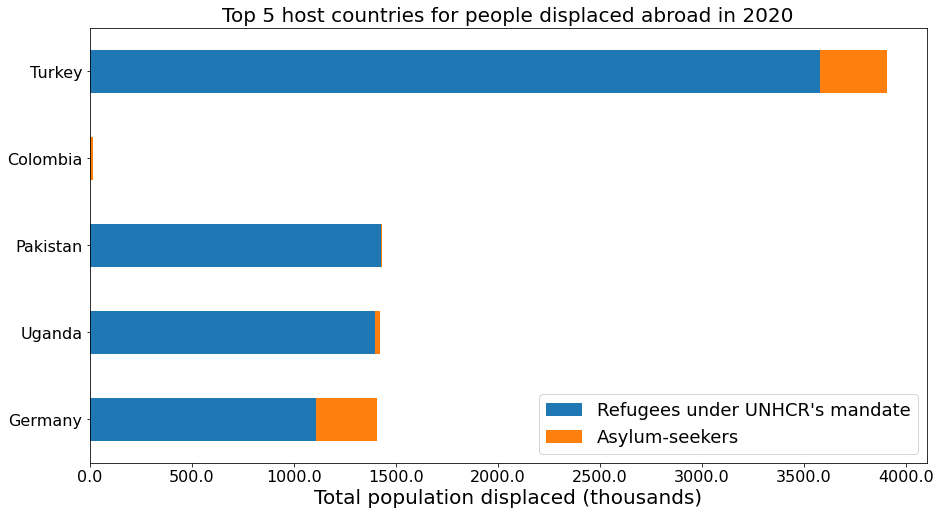

In [21]:
# Plot the top 10 countries of asylum for year 2020
summariseyearbycountry(population, 'Country of asylum', 2020, 5, 'Top 5 host countries for people displaced abroad in 2020')

#plt.savefig('figures/topcountriesofasylum2020', format='png', dpi=300, bbox_inches='tight')

<ipython-input-20-201dcbc4db83>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.1f}'.format(round(x / 1e3, 1)) for x in current_values])


<AxesSubplot:title={'center':'Top 6 host countries for Syrians displaced abroad in 2014'}, xlabel='Total population displaced (thousands)'>

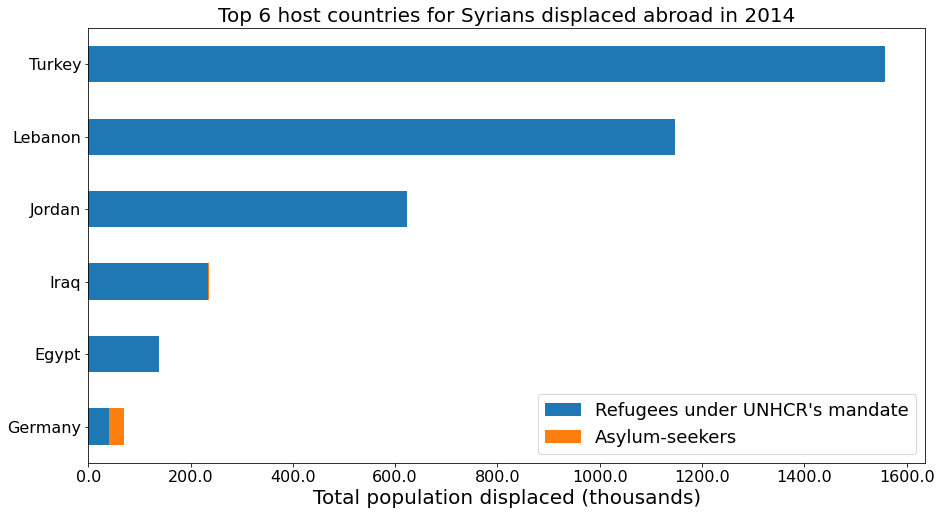

In [22]:
syrians = population.query("`Country of origin` == 'Syrian Arab Rep.'")

summariseyearbycountry(syrians, 'Country of asylum', 2014, 6, 'Top 6 host countries for Syrians displaced abroad in 2014')
#summariseyearbycountry(syrians, 'Country of asylum', 2020, 6, 'Top 6 host countries for Syrians displaced abroad in 2020')

#plt.savefig('figures/syriantopcountriesofasylum2014', format='png', dpi=300, bbox_inches='tight')
#plt.savefig('figures/syriantopcountriesofasylum2020', format='png', dpi=300, bbox_inches='tight')

<ipython-input-10-201dcbc4db83>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.1f}'.format(round(x / 1e3, 1)) for x in current_values])


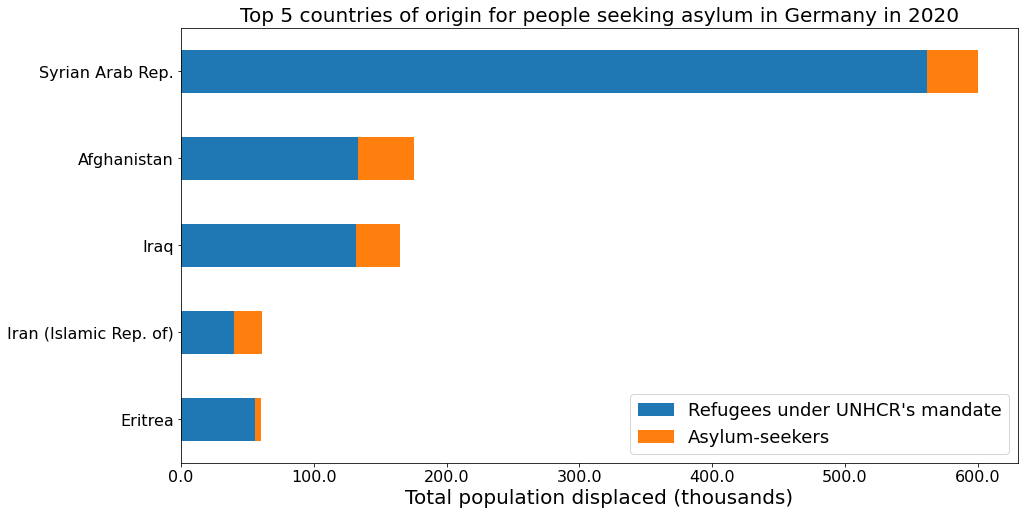

In [12]:
germany = population.query("`Country of asylum` == 'Germany'")

summariseyearbycountry(germany, 'Country of origin', 2020, 5, 'Top 5 countries of origin for people seeking asylum in Germany in 2020')
#summariseyearbycountry(germany, 'Country of origin', 2010, 5, 'Top 5 countries of origin for people seeking asylum in Germany in 2010')

plt.savefig('figures/germanytopcountriesoforigin2020', format='png', dpi=300, bbox_inches='tight')
#plt.savefig('figures/germanytopcountriesoforigin2010', format='png', dpi=300, bbox_inches='tight')

In [25]:
def calcpcttopcountries(popdata, countrytype, year, topnr):
    # Calculate the % of total people displaced in the top countries for a particular year
    popyear = popdata.query("`Year` == @year")
    popyear_type = popyear.groupby(countrytype).sum()
    popyear_type = popyear_type.sort_values(by='total_abroad', ascending=False)
    topcountry = popyear_type[:topnr+1]
    
    pct_top10 = topcountry['total_abroad'].sum() / popyear['total_abroad'].sum()
    if 'asylum' in countrytype:
        print("For year {} the top {} host countries represent {:.3f} % of total.".format(year, topnr, pct_top10*100))
    else:
        print("For year {} the top {} countries of origin represent {:.3f} % of total.".format(year, topnr, pct_top10*100))


In [26]:
# Calculate the % for the top 10 countries of origin and asylum in year 2020
calcpcttopcountries(population, 'Country of asylum', 2020, 5)
#calcpcttopcountries(population, 'Country of origin', 2020)

For year 2020 the top 5 host countries represent 39.483 % of total.


In [27]:
# Calculate the % for the top 10 countries of origin and asylum in year 2018
calcpcttopcountries(population, 'Country of asylum', 2018, 5)
calcpcttopcountries(population, 'Country of origin', 2018, 5)

For year 2018 the top 5 host countries represent 38.925 % of total.
For year 2018 the top 5 countries of origin represent 65.557 % of total.


In [29]:
# Calculate change in years

# create a join id column in the population data frame
population['id'] = population['Year'].astype(str) + '_' + population['Country of origin (ISO)'].astype(str) + '_' + population['Country of asylum (ISO)'].astype(str)

# copy the population data frame 
population_previous_year = population.copy()
# add plus onto the 'Year' column, this will allow us to join the previous_year data frame back to the correct year in the population data frame
population_previous_year['Year'] = population_previous_year['Year'] + 1
# create the id which will match the population data frame
population_previous_year['id'] = population_previous_year['Year'].astype(str) + '_' + population_previous_year['Country of origin (ISO)'].astype(str) + '_' + population_previous_year['Country of asylum (ISO)'].astype(str)

# merge the data frames on the ids
population_merged = pd.merge(population, population_previous_year, on='id')

# calculate the change over the year be subtracting the current year total from the prvious year total
population_merged['refugee_change_in_year'] = population_merged['Refugees under UNHCR\'s mandate_x'] - population_merged['Refugees under UNHCR\'s mandate_y']
population_merged['asylseeker_change_in_year'] = population_merged['Asylum-seekers_x'] - population_merged['Asylum-seekers_y']
population_merged['idps_change_in_year'] = population_merged['IDPs of concern to UNHCR_x'] - population_merged['IDPs of concern to UNHCR_y']
population_merged['venezdisplaced_change_in_year'] = population_merged['Venezuelans displaced abroad_x'] - population_merged['Venezuelans displaced abroad_y']
population_merged['stateless_change_in_year'] = population_merged['Stateless persons_x'] - population_merged['Stateless persons_y']
population_merged['others_change_in_year'] = population_merged['Others of concern_x'] - population_merged['Others of concern_y']
population_merged['total_change_in_year'] = population_merged['total_x'] - population_merged['total_y']
population_merged['total_abroad_change_in_year'] = population_merged['total_abroad_x'] - population_merged['total_abroad_y']


<ipython-input-30-549950f5aeea>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(round(x / 1e6, 1)) for x in current_values])


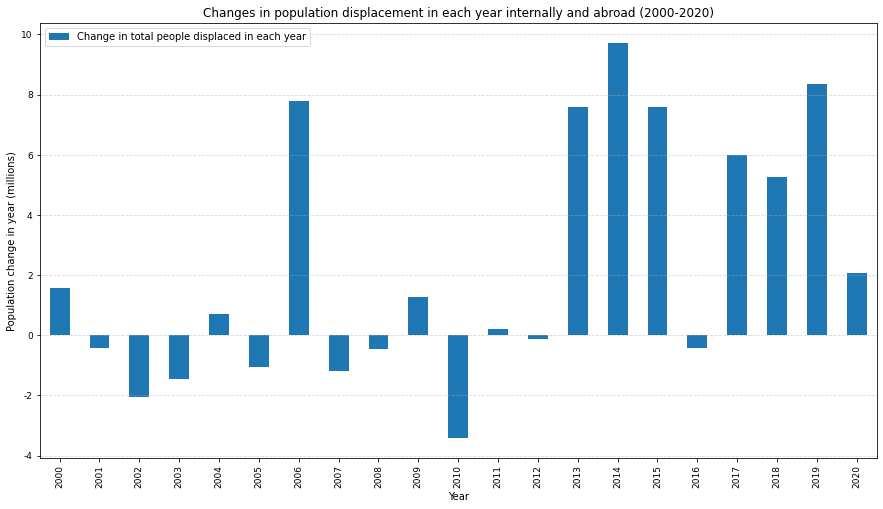

In [30]:
# Filter for a specific year and group by that year
# Plot the changes in each year for each variable
population_merged = population_merged.query("`Year_x` >= 2000")
changesinyear = population_merged.groupby(by='Year_x').sum()
changesinyear.plot(y=['total_change_in_year'], 
                   kind='bar', fontsize=9, ylabel='Population change in year (millions)', 
                   xlabel='Year', 
                   title='Changes in population displacement in each year internally and abroad (2000-2020)', 
                   figsize=(15, 8))

plt.legend(['Change in total people displaced in each year'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(round(x / 1e6, 1)) for x in current_values])

plt.grid(which='major', axis='y', linestyle='--', linewidth='0.8', alpha=0.5)

#plt.savefig('totaldisplacementsineachyear.png', format='png', bbox_inches='tight')

plt.show()

### Chloropleth maps 

In [34]:
# Read in our worldmap if you haven't already
worldMap = gpd.read_file("World-Background-Data/world_borders.geo.json")

# Function creating a choropleth map
def plot_choropleth(popdata, year, countrytype, col, plottitle):
    # Create a dataframe
    df = popdata[popdata['Year'] == year]
    # Group that year by Country of asylum or origin
    df = df.groupby(countrytype).agg(
        # Create some aggregate columns summing over all the numbers for a given year
        total_asylum=('Asylum-seekers', sum),
        total_refugees=("Refugees under UNHCR's mandate", sum),
        total_IDPs=('IDPs of concern to UNHCR', sum),
        total_venezuelans = ('Venezuelans displaced abroad', sum),
        total_stateless = ('Stateless persons', sum),
        total_others = ('Others of concern', sum),
        total = ('total', sum),
        total_abroad = ('total_abroad', sum)
    )

    # Merge the worldmap - this is imperfect, some countries aren't recognised by the UN/are disputed.
    # Others no longer exist, but should be of some use.
    df = worldMap.merge(df, left_on='iso_a3', right_on=countrytype)
    # Create a figure
    ax = df.plot(col, legend=True, linewidth=0.1, figsize=(15, 8),
                legend_kwds={'label': "Population displaced"})
    
    #Label the legend
    ax.set_title(plottitle, pad=20, fontsize=18) # Set a title offset from plot
    
    return ax

(-60.0, 20.0)

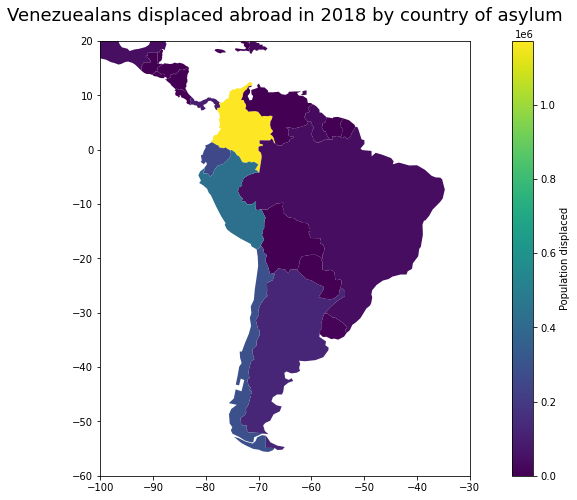

In [35]:
# Map of Venezuelans displaced abroad in 2018 by country of asylum
ax = plot_choropleth(population, 2018, 'Country of asylum (ISO)', 
                     'total_venezuelans', 'Venezuealans displaced abroad in 2018 by country of asylum')

ax.set_xlim(left=-100, right=-30)
ax.set_ylim(bottom=-60, top=20)

#plt.savefig('figures/venezuelans2018asylumcountry', format='png', dpi=300, bbox_inches='tight')

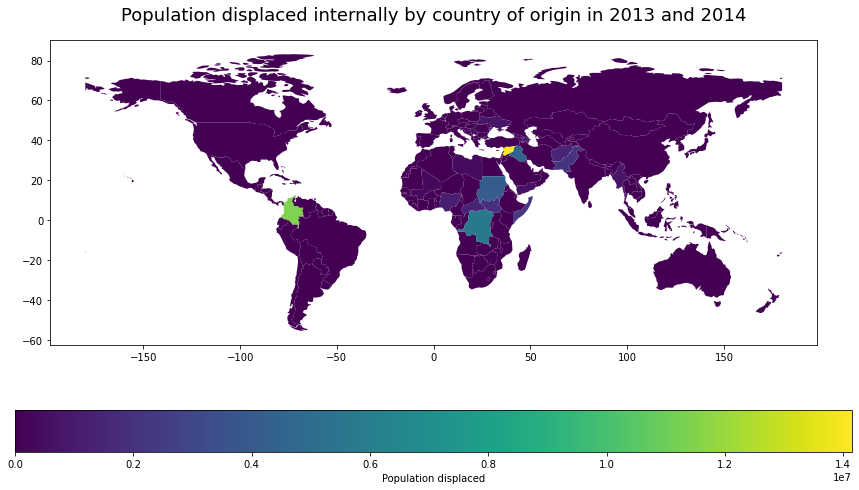

In [37]:
# Chloropleth world map of population displaced internally by country of origin in 2013-2014
popdata = population
countrytype = 'Country of origin (ISO)'
col = 'total_IDPs'
plottitle = 'Population displaced internally by country of origin in 2013 and 2014'

df = popdata.query("`Year` >= 2013 and `Year` <= 2014")
    
# Group that year by Country of asylum or origin
df = df.groupby(countrytype).agg(
    # Create some aggregate columns summing over all the numbers for a given year
    total_asylum=('Asylum-seekers', sum),
    total_refugees=("Refugees under UNHCR's mandate", sum),
    total_IDPs=('IDPs of concern to UNHCR', sum),
    total_venezuelans = ('Venezuelans displaced abroad', sum),
    total_stateless = ('Stateless persons', sum),
    total_others = ('Others of concern', sum),
    total = ('total', sum),
    total_abroad = ('total_abroad', sum)
)

# Merge the worldmap - this is imperfect, some countries aren't recognised by the UN/are disputed.
# Others no longer exist, but should be of some use.
df = worldMap.merge(df, left_on='iso_a3', right_on=countrytype)
# Create a figure
ax = df.plot(col, legend=True, linewidth=0.1, figsize=(15, 8),
            legend_kwds={'label': "Population displaced", 'orientation': "horizontal"})
    
#Label the legend
ax.set_title(plottitle, pad=20, fontsize=18) # Set a title offset from plot

plt.show()

#plt.savefig('figures/internaldisplacement20132014', format='png', dpi=300, bbox_inches='tight')

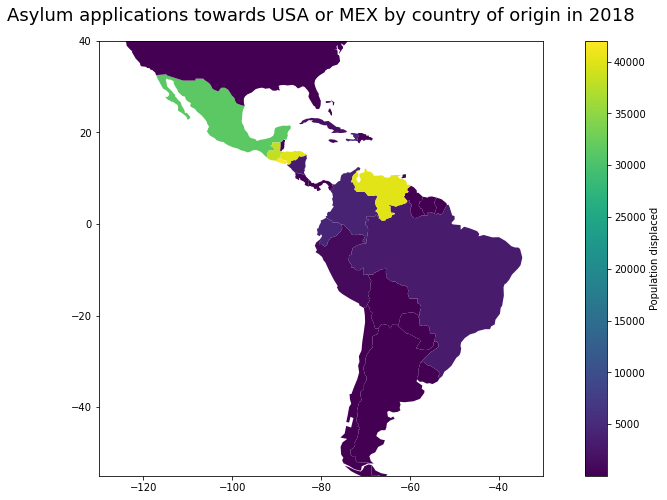

In [38]:
# Chloropleth map of asylum applications towards USA/MEX by country of origin in 2018 
americanapps = applications.query("`Year` == 2018 and (`Country of asylum (ISO)` == 'USA' or \
                                    `Country of asylum (ISO)` == 'MEX')")
countrytype = 'Country of origin (ISO)'

df = americanapps
df = df.groupby(countrytype).agg(total = ('applied', sum))

df = worldMap.merge(df, left_on='iso_a3', right_on=countrytype)

ax = df.plot('total', legend=True, linewidth=0.1, figsize=(15, 8),
            legend_kwds={'label': "Population displaced"})
ax.set_ylim(-55, 40)
ax.set_xlim(-130, -30)
ax.set_title('Asylum applications towards USA or MEX by country of origin in 2018', pad=20, fontsize=18) # Set a title offset from plot

plt.show()
#plt.savefig('figures/americanasylapps2018', format='png', dpi=300, bbox_inches='tight')